## Dual Governance Agent-based modelling



In [1]:
%pip show radcad

Name: radcad
Version: 0.13.0
Summary: A Python package for dynamical systems modelling & simulation, inspired by and compatible with cadCAD
Home-page: 
Author: CADLabs
Author-email: benschza@users.noreply.github.com
License: 
Location: /opt/anaconda3/envs/my-conda-env/lib/python3.12/site-packages
Requires: fn-py, numpy, pandas, pathos, py
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependences
import pandas as pd
import numpy as np

# radCAD
from radcad import Model, Simulation, Experiment
from radcad.engine import Engine, Backend

# Experiments
from model import run
from model.parts.utils import *

pd.options.display.float_format = "{:.2f}".format

%matplotlib inline

In [25]:
from model.state_variables import initial_state
from model.state_update_blocks import state_update_blocks
from model.sys_params import sys_params

MONTE_CARLO_RUNS = 1
TIMESTEPS = 1000

model = Model(
    initial_state=initial_state,
    params=sys_params,
    state_update_blocks=state_update_blocks,
)
simulation = Simulation(model=model, timesteps=TIMESTEPS, runs=MONTE_CARLO_RUNS)

result = simulation.run()
df = pd.DataFrame(result)
rdf = run.postprocessingNew(df)

In [26]:
df.head()

,agents,dg,proposals,simulation,subset,run,substep,timestep
0,{c2d62923-32f0-49d3-bea1-a9eaf7ccb5b2: {'st_am...,DualGovernanceState(config=DualGovernanceConfi...,{},0,0,1,0,0
1,{c2d62923-32f0-49d3-bea1-a9eaf7ccb5b2: {'st_am...,DualGovernanceState(config=DualGovernanceConfi...,{},0,0,1,1,1
2,{c2d62923-32f0-49d3-bea1-a9eaf7ccb5b2: {'st_am...,DualGovernanceState(config=DualGovernanceConfi...,{},0,0,1,2,1
3,{c2d62923-32f0-49d3-bea1-a9eaf7ccb5b2: {'st_am...,DualGovernanceState(config=DualGovernanceConfi...,{},0,0,1,3,1
4,{c2d62923-32f0-49d3-bea1-a9eaf7ccb5b2: {'st_am...,DualGovernanceState(config=DualGovernanceConfi...,{},0,0,1,4,1


In [27]:
rdf.head()

,timestep,run,proposals_count,st_at_agents,st_in_escrow,dg_state
4,1,1,0,694288.44,0.00,1
8,2,1,0,694288.44,0.00,1
12,3,1,0,694288.44,0.00,1
16,4,1,0,694288.44,0.00,1
20,5,1,0,694288.44,0.00,1


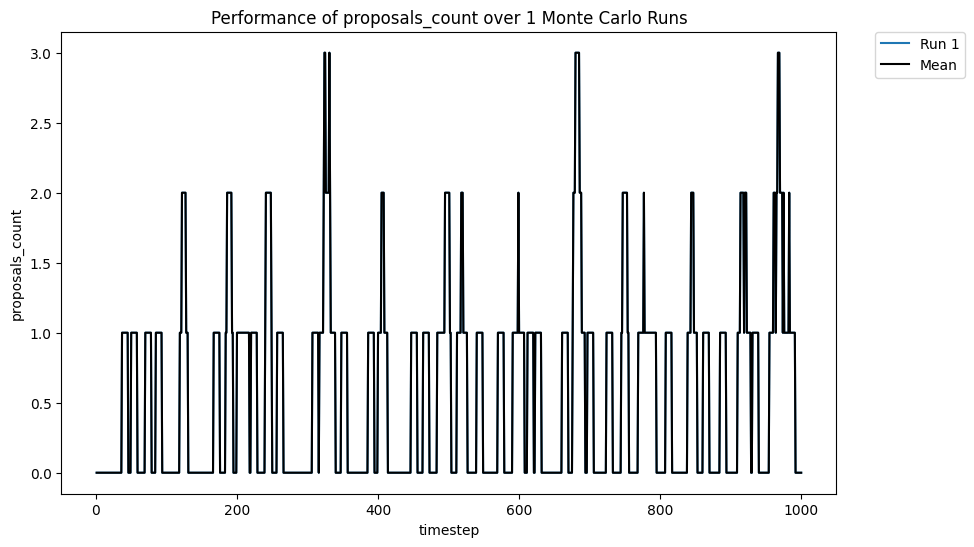

In [28]:
monte_carlo_plot(rdf, "timestep", "timestep", "proposals_count", 1)

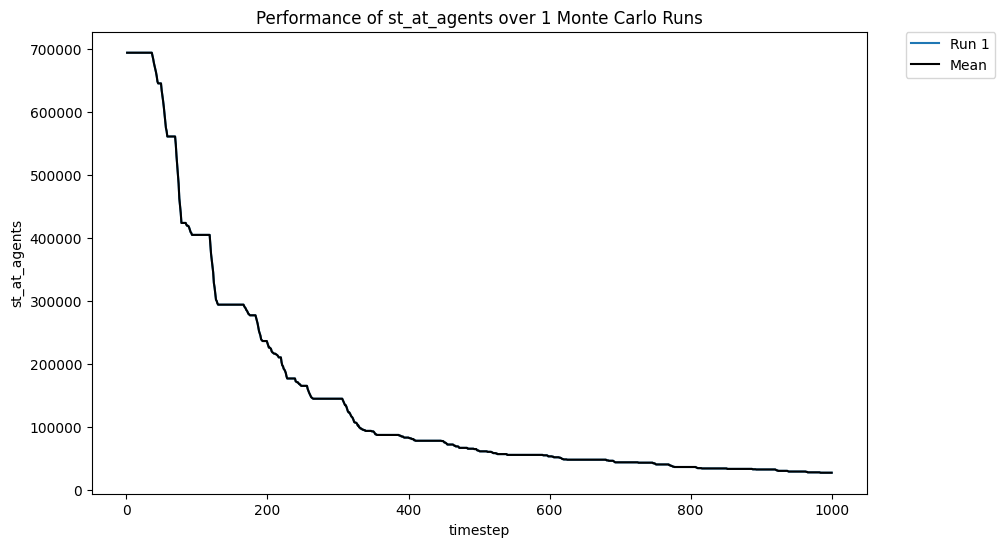

In [29]:
monte_carlo_plot(rdf, "timestep", "timestep", "st_at_agents", 1)

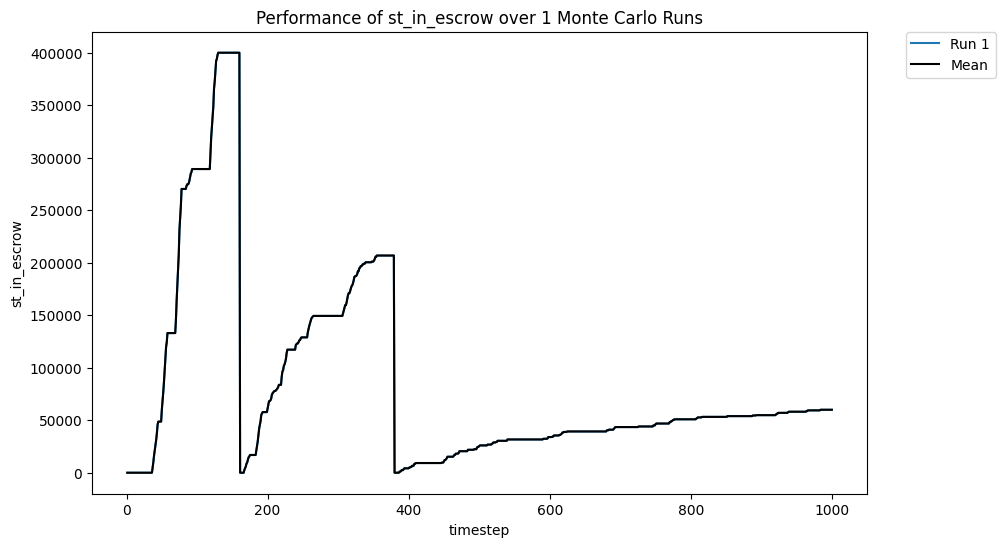

In [30]:
monte_carlo_plot(rdf, "timestep", "timestep", "st_in_escrow", 1)

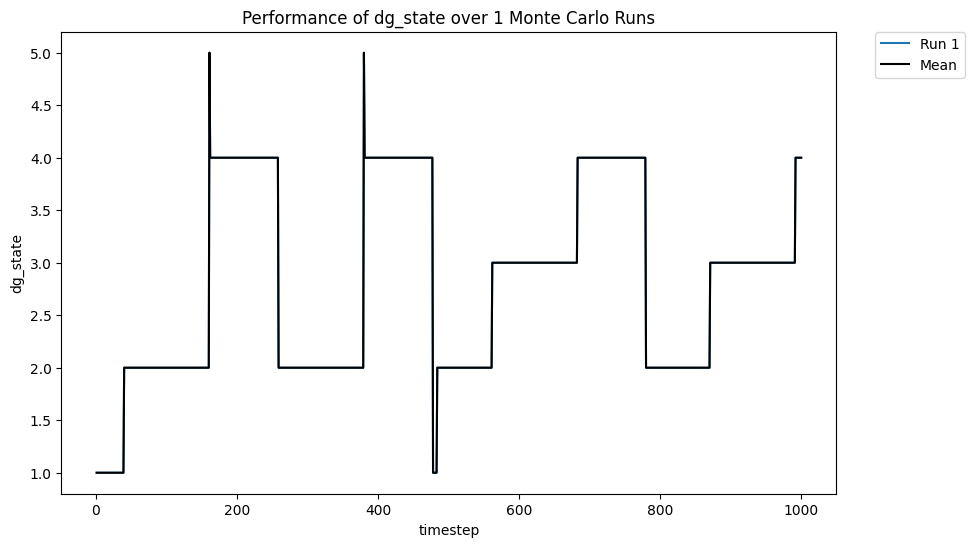

In [31]:
monte_carlo_plot(rdf, "timestep", "timestep", "dg_state", 1)